Members :  
    Arvind Pandit (211022001)   
    Girish Kumar Gupta (211022002)  
    Sumanth S Raikar (211022005) 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bernoulli Distribution of rewards

In [2]:
class epsilon_Greedy:
    '''Choose arms equally likely with probability epsilon
       Choose greedy stratergy with probability 1-epsilon'''
    def __init__(self,epsilon,no_of_arms,no_of_games,is_e_i_greedy):
        self.epsilon=epsilon
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        if (self.no_of_arms==10):
          self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        if (self.no_of_arms==5):
          self.arm_win_probs = np.array([0.50,0.57,0.32,0.25,0.2])
        if (self.no_of_arms==2):
          self.arm_win_probs = np.array([0.5,0.3])  

        # self.arm_win_probs=np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.50
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        self.regret = np.zeros((1,no_of_games))[0]
        if is_e_i_greedy:
          self.e_i_greedy=True
        else:
          self.e_i_greedy=False  

    def reward_generator(self,name,arm_id,i):
        if (name=='bernoulli'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            reward=np.random.choice([1,0],p=[prob,1-prob]) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret      

    def select_arms(self,reward_mat,action_mat,i):
      
        r = np.random.random()
        if self.e_i_greedy:
          self.epsilon = np.min([1,((0.2*self.no_of_arms)/(((self.best_mean-0.35)**2)*(i+1)))])
        net_reward = reward_mat.sum(axis=0)
        per_arm_total = action_mat.sum(axis=0)
        empirical_mean = net_reward/per_arm_total
        if r<self.epsilon:
          #arm=np.random.choice(np.delete(list(range(N_BANDITS)), np.argmax(success_ratio)))
          arm= np.random.choice(list(range(1,self.no_of_arms+1)))   
          return arm     
              
        else:
          #Select Arm with highest empirical mean reward
          arm = np.argmax(empirical_mean)+1
          return arm  
        #self.action_matrix[i,int(arm)-1] = 1
        #self.reward_matrix[i,int(arm)-1] = self.reward_generator('bernoulli', int(arm))

          
        
        
    #def get_output(self):
    #    return self.action_matrix,self.reward_matrix,self.best_arm,self.best_mean,self.regret


In [3]:
class UCB:
    
    def __init__(self,no_of_arms,no_of_games):
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        # self.arm_win_probs=np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.50
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = []

    def reward_generator(self,name,arm_id,i):
        if (name=='bernoulli'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            reward=np.random.choice([1,0],p=[prob,1-prob]) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret    

    def select_arms(self,reward_mat,action_mat,i):
      
        net_reward = reward_mat.sum(axis=0)
        per_arm_total = action_mat.sum(axis=0)
        empirical_mean = net_reward/per_arm_total
        bias = np.sqrt(2*np.log(np.sum(per_arm_total))/per_arm_total)
        return np.argmax(empirical_mean+bias)+1
               


In [4]:
class Softmax:
    
    def __init__(self,temprature,no_of_arms,no_of_games):
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        self.temp = temprature
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        # self.arm_win_probs=np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.50
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = []

    def reward_generator(self,name,arm_id,i):
        if (name=='bernoulli'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            reward=np.random.choice([1,0],p=[prob,1-prob]) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret    

    def select_arms(self,reward_mat,action_mat,i):
      
        net_reward = reward_mat.sum(axis=0)
        per_arm_total = action_mat.sum(axis=0)
        empirical_mean = net_reward/per_arm_total
        denom = np.sum(np.exp(empirical_mean/self.temp))
        val = np.exp(empirical_mean)/denom
        return np.argmax(val)+1
               


In [5]:
class Thompson_Sampling:
    
    def __init__(self,no_of_arms,no_of_games):
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        # self.arm_win_probs=np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.50
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = []

    def reward_generator(self,name,arm_id,i):
        if (name=='bernoulli'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            reward=np.random.choice([1,0],p=[prob,1-prob]) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret    

    def select_arms(self,reward_mat,action_mat,i):
      
        net_reward = reward_mat.sum(axis=0) #Computes sum of rewards for each arm(0 or 1)
        per_arm_total = action_mat.sum(axis=0)#Computes number of times each arm was picked(0 or 1)
        loss_count = per_arm_total-net_reward# Computes number of times each arm lost
        if i==0:
          print(net_reward[0],loss_count[0])
        
        ''' Beta distribution characterized by alpha and beta
        Every time it wins alpha increments else beta increments'''
        arms = [np.random.beta(1+net_reward[j],1+loss_count[j]) for j in range(self.no_of_arms)]
        
        return np.argmax(arms)+1
               


In [6]:
class RC():
    def __init__(self, n_arms,no_of_plays):
        
        self.no_of_plays = no_of_plays
        self.n_arms = n_arms
        self.actual_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])
        self.best=np.max(self.actual_probs)
        self.preference = np.zeros((1,self.n_arms))[0]
        self.beta = 0.01
        self.reward=np.zeros((self.n_arms,self.no_of_plays))
        self.regret = np.zeros((1,self.no_of_plays))[0]
        self.exp_reward=0

    def softmax_cal(self):
      return np.exp(self.preference)/np.sum(np.exp(self.preference))

    def update(self,name,i):
      reward_t,self.regret[i],arm_id = self.reward_generator(name,np.random.choice(np.arange(1,self.n_arms + 1),p=self.softmax_cal()))
      self.exp_reward =(1-1.0/(i+1))*self.exp_reward+(1.0/(i+1))*reward_t
      difference = reward_t-self.exp_reward
      self.preference[arm_id-1]=self.preference[arm_id-1]+self.beta*difference
      self.exp_reward = self.exp_reward+ (1/(i+1)*(reward_t-self.exp_reward))
    
      

    def reward_generator(self,name,arm_id):
      if name=='bernoulli':
        prob = self.actual_probs[arm_id-1] 
        reward=np.random.choice([1,0],p=[prob,1-prob]) 
        regret = self.best-self.actual_probs[arm_id-1] 
      if name=='normy':
        prob = self.actual_probs[arm_id-1]
        reward = np.random.normal(prob,1,1)
        regret = self.best-self.actual_probs[arm_id-1]  

      return reward,regret,arm_id

## K=2

In [7]:
#E-Greedy
no_of_games=10000
reward_matrix = np.zeros((no_of_games,2))
action_matrix = np.zeros((no_of_games,2))
regret_arr = np.zeros((1,no_of_games))[0]
exp1 = epsilon_Greedy(0.1,no_of_arms=2,no_of_games=10000,is_e_i_greedy=0)
for i in range(no_of_games):
  arm=exp1.select_arms(reward_matrix,action_matrix,i)
  action_matrix[i,int(arm)-1]=1
  reward_matrix[i,int(arm)-1],regret_arr[i] = exp1.reward_generator('bernoulli', int(arm),i) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [8]:
#E-t Greedy
no_of_games=10000

reward_matrix2 = np.zeros((no_of_games,2))
action_matrix2 = np.zeros((no_of_games,2))
regret_arr2 = np.zeros((1,no_of_games))[0]
exp2 = epsilon_Greedy(0.1,no_of_arms=2,no_of_games=10000,is_e_i_greedy=1)
for i in range(no_of_games):
  arm=exp2.select_arms(reward_matrix2,action_matrix2,i)
  action_matrix2[i,int(arm)-1]=1
  reward_matrix2[i,int(arm)-1],regret_arr2[i] = exp2.reward_generator('bernoulli', int(arm),i) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [9]:
#UCB
reward_matrix3 = np.zeros((no_of_games,2))
action_matrix3 = np.zeros((no_of_games,2))
regret_arr3 = np.zeros((1,no_of_games))[0]
ucb1 = UCB(no_of_arms=2,no_of_games=10000)
for i in range(10000):
  arm=ucb1.select_arms(reward_matrix3,action_matrix3,i)
  action_matrix3[i,int(arm)-1]=1
  reward_matrix3[i,int(arm)-1],regret_arr3[i] = ucb1.reward_generator('bernoulli', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [10]:
#Softmax

reward_matrix4 = np.zeros((no_of_games,2))
action_matrix4 = np.zeros((no_of_games,2))
regret_arr4 = np.zeros((1,no_of_games))[0]
soft = Softmax(temprature=0.01,no_of_arms=2,no_of_games=10000)
for i in range(10000):
  arm=soft.select_arms(reward_matrix4,action_matrix4,i)
  action_matrix4[i,int(arm)-1]=1
  reward_matrix4[i,int(arm)-1],regret_arr4[i] = soft.reward_generator('bernoulli', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [11]:
#Thompson-Sampling

reward_matrix5 = np.zeros((no_of_games,2))
action_matrix5 = np.zeros((no_of_games,2))
regret_arr5 = np.zeros((1,no_of_games))[0]
TS = Thompson_Sampling(no_of_arms=2,no_of_games=10000)
for i in range(10000):
  arm=TS.select_arms(reward_matrix5,action_matrix5,i)
  action_matrix5[i,int(arm)-1]=1
  reward_matrix5[i,int(arm)-1],regret_arr5[i] = TS.reward_generator('bernoulli', int(arm),i) 


0.0 0.0


In [12]:
# Reinforce
Recomp_bernoulli = RC(n_arms=2,no_of_plays=10000)

for i in range(10000):
  Recomp_bernoulli.update('bernoulli',i)

print(f'The learnt preference vector for Bernoulli Rewards is{Recomp_bernoulli.preference}')
print(f'The best arm from Algorithm is {np.argmax(Recomp_bernoulli.preference)+1}')


The learnt preference vector for Bernoulli Rewards is[-1.01531099  1.10876999]
The best arm from Algorithm is 2


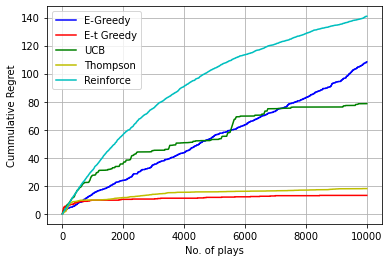

In [13]:
plt.plot(np.cumsum(regret_arr),'b',label='E-Greedy')
plt.plot(np.cumsum(regret_arr2),'r',label='E-t Greedy')
plt.plot(np.cumsum(regret_arr3),'g',label='UCB')
plt.plot(np.cumsum(regret_arr5),'y',label='Thompson')
plt.plot(np.cumsum(Recomp_bernoulli.regret),'c',label='Reinforce')
plt.legend(loc='upper left',ncol=1)
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

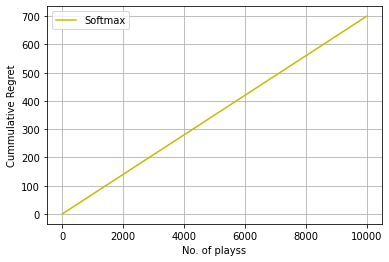

In [14]:
plt.plot(np.cumsum(regret_arr4),'y',label='Softmax')
plt.legend()
plt.xlabel('No. of playss')
plt.ylabel("Cummulative Regret")
plt.grid()

## K=5

In [15]:
#E-Greedy
no_of_games=10000
reward_matrix = np.zeros((no_of_games,5))
action_matrix = np.zeros((no_of_games,5))
regret_arr = np.zeros((1,no_of_games))[0]
exp1 = epsilon_Greedy(0.1,no_of_arms=5,no_of_games=10000,is_e_i_greedy=0)
for i in range(no_of_games):
  arm=exp1.select_arms(reward_matrix,action_matrix,i)
  action_matrix[i,int(arm)-1]=1
  reward_matrix[i,int(arm)-1],regret_arr[i] = exp1.reward_generator('bernoulli', int(arm),i) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [16]:
#E-t Greedy
no_of_games=10000

reward_matrix2 = np.zeros((no_of_games,5))
action_matrix2 = np.zeros((no_of_games,5))
regret_arr2 = np.zeros((1,no_of_games))[0]
exp2 = epsilon_Greedy(0.1,no_of_arms=5,no_of_games=10000,is_e_i_greedy=1)
for i in range(no_of_games):
  arm=exp2.select_arms(reward_matrix2,action_matrix2,i)
  action_matrix2[i,int(arm)-1]=1
  reward_matrix2[i,int(arm)-1],regret_arr2[i] = exp2.reward_generator('bernoulli', int(arm),i) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [17]:
#UCB
reward_matrix3 = np.zeros((no_of_games,5))
action_matrix3 = np.zeros((no_of_games,5))
regret_arr3 = np.zeros((1,no_of_games))[0]
ucb1 = UCB(no_of_arms=5,no_of_games=10000)
for i in range(10000):
  arm=ucb1.select_arms(reward_matrix3,action_matrix3,i)
  action_matrix3[i,int(arm)-1]=1
  reward_matrix3[i,int(arm)-1],regret_arr3[i] = ucb1.reward_generator('bernoulli', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


In [18]:
#Softmax

reward_matrix4 = np.zeros((no_of_games,5))
action_matrix4 = np.zeros((no_of_games,5))
regret_arr4 = np.zeros((1,no_of_games))[0]
soft = Softmax(temprature=0.01,no_of_arms=5,no_of_games=10000)
for i in range(10000):
  arm=soft.select_arms(reward_matrix4,action_matrix4,i)
  action_matrix4[i,int(arm)-1]=1
  reward_matrix4[i,int(arm)-1],regret_arr4[i] = soft.reward_generator('bernoulli', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [19]:
#Thompson-Sampling

reward_matrix5 = np.zeros((no_of_games,5))
action_matrix5 = np.zeros((no_of_games,5))
regret_arr5 = np.zeros((1,no_of_games))[0]
TS = Thompson_Sampling(no_of_arms=5,no_of_games=10000)
for i in range(10000):
  arm=TS.select_arms(reward_matrix5,action_matrix5,i)
  action_matrix5[i,int(arm)-1]=1
  reward_matrix5[i,int(arm)-1],regret_arr5[i] = TS.reward_generator('bernoulli', int(arm),i) 


0.0 0.0


In [20]:
# Reinforce
Recomp_bernoulli = RC(n_arms=5,no_of_plays=10000)

for i in range(10000):
  Recomp_bernoulli.update('bernoulli',i)

print(f'The learnt preference vector for Bernoulli Rewards is{Recomp_bernoulli.preference}')
print(f'The best arm from Algorithm is {np.argmax(Recomp_bernoulli.preference)+1}')


The learnt preference vector for Bernoulli Rewards is[ 0.73807893  5.20109353 -0.65864628 -0.86257951 -1.00676467]
The best arm from Algorithm is 2


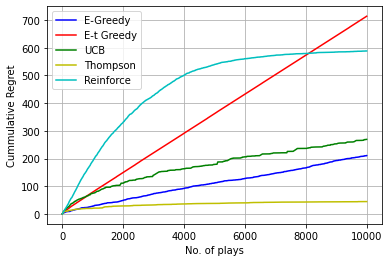

In [21]:
plt.plot(np.cumsum(regret_arr),'b',label='E-Greedy')
plt.plot(np.cumsum(regret_arr2),'r',label='E-t Greedy')
plt.plot(np.cumsum(regret_arr3),'g',label='UCB')
plt.plot(np.cumsum(regret_arr5),'y',label='Thompson')
plt.plot(np.cumsum(Recomp_bernoulli.regret),'c',label='Reinforce')
plt.legend(loc='upper left',ncol=1)
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

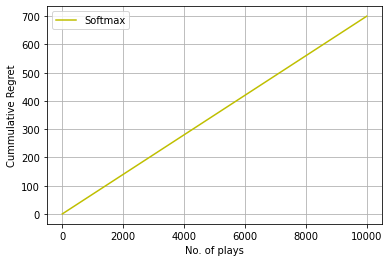

In [22]:
plt.plot(np.cumsum(regret_arr4),'y',label='Softmax')
plt.legend()
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

## K=10

In [23]:
#E-Greedy
no_of_games=10000
reward_matrix = np.zeros((no_of_games,10))
action_matrix = np.zeros((no_of_games,10))
regret_arr = np.zeros((1,no_of_games))[0]
exp1 = epsilon_Greedy(0.1,no_of_arms=10,no_of_games=10000,is_e_i_greedy=0)
for i in range(no_of_games):
  arm=exp1.select_arms(reward_matrix,action_matrix,i)
  action_matrix[i,int(arm)-1]=1
  reward_matrix[i,int(arm)-1],regret_arr[i] = exp1.reward_generator('bernoulli', int(arm),i) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [24]:
#E-t Greedy
no_of_games=10000

reward_matrix2 = np.zeros((no_of_games,10))
action_matrix2 = np.zeros((no_of_games,10))
regret_arr2 = np.zeros((1,no_of_games))[0]
exp2 = epsilon_Greedy(0.1,no_of_arms=10,no_of_games=10000,is_e_i_greedy=1)
for i in range(no_of_games):
  arm=exp2.select_arms(reward_matrix2,action_matrix2,i)
  action_matrix2[i,int(arm)-1]=1
  reward_matrix2[i,int(arm)-1],regret_arr2[i] = exp2.reward_generator('bernoulli', int(arm),i) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


In [25]:
#UCB
reward_matrix3 = np.zeros((no_of_games,10))
action_matrix3 = np.zeros((no_of_games,10))
regret_arr3 = np.zeros((1,no_of_games))[0]
ucb1 = UCB(no_of_arms=10,no_of_games=10000)
for i in range(10000):
  arm=ucb1.select_arms(reward_matrix3,action_matrix3,i)
  action_matrix3[i,int(arm)-1]=1
  reward_matrix3[i,int(arm)-1],regret_arr3[i] = ucb1.reward_generator('bernoulli', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in true_divide


In [26]:
#Softmax

reward_matrix4 = np.zeros((no_of_games,10))
action_matrix4 = np.zeros((no_of_games,10))
regret_arr4 = np.zeros((1,no_of_games))[0]
soft = Softmax(temprature=0.05,no_of_arms=10,no_of_games=10000)
for i in range(10000):
  arm=soft.select_arms(reward_matrix4,action_matrix4,i)
  action_matrix4[i,int(arm)-1]=1
  reward_matrix4[i,int(arm)-1],regret_arr4[i] = soft.reward_generator('bernoulli', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


In [27]:
#Thompson-Sampling

reward_matrix5 = np.zeros((no_of_games,10))
action_matrix5 = np.zeros((no_of_games,10))
regret_arr5 = np.zeros((1,no_of_games))[0]
TS = Thompson_Sampling(no_of_arms=10,no_of_games=10000)
for i in range(10000):
  arm=TS.select_arms(reward_matrix5,action_matrix5,i)
  action_matrix5[i,int(arm)-1]=1
  reward_matrix5[i,int(arm)-1],regret_arr5[i] = TS.reward_generator('bernoulli', int(arm),i) 


0.0 0.0


In [28]:
# Reinforce
Recomp_bernoulli = RC(n_arms=10,no_of_plays=10000)

for i in range(10000):
  Recomp_bernoulli.update('bernoulli',i)

print(f'The learnt preference vector for Bernoulli Rewards is{Recomp_bernoulli.preference}')
print(f'The best arm from Algorithm is {np.argmax(Recomp_bernoulli.preference)+1}')


The learnt preference vector for Bernoulli Rewards is[ 0.83280043  6.24214333 -0.25500927 -0.50251452 -0.6371477   0.47925723
 -0.01226775 -0.56674575 -0.17444565 -0.80861034]
The best arm from Algorithm is 2


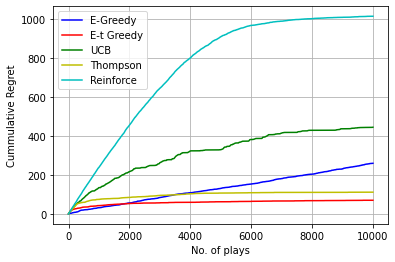

In [29]:
plt.plot(np.cumsum(regret_arr),'b',label='E-Greedy')
plt.plot(np.cumsum(regret_arr2),'r',label='E-t Greedy')
plt.plot(np.cumsum(regret_arr3),'g',label='UCB')
plt.plot(np.cumsum(regret_arr5),'y',label='Thompson')
plt.plot(np.cumsum(Recomp_bernoulli.regret),'c',label='Reinforce')
plt.legend(loc='upper left',ncol=1)
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

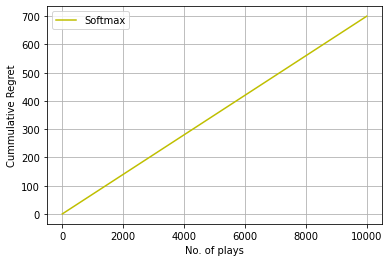

In [30]:
plt.plot(np.cumsum(regret_arr4),'y',label='Softmax')
plt.legend()
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

# Normal Distribution rewards

In [31]:
class epsilon_Greedy:
    '''Choose arms equally likely with probability epsilon
       Choose greedy stratergy with probability 1-epsilon'''
    def __init__(self,epsilon,no_of_arms,no_of_games,is_e_i_greedy):
        self.epsilon=epsilon
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.mean=[0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1]
        if (self.no_of_arms==10):
          self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        if (self.no_of_arms==5):
          self.arm_win_probs = np.array([0.50,0.57,0.32,0.25,0.2])
        if (self.no_of_arms==2):
          self.arm_win_probs = np.array([0.5,0.3])  
        self.second_best = 0.35
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = np.zeros((1,no_of_games))[0]
        if is_e_i_greedy:
          self.e_i_greedy=True
        else:
          self.e_i_greedy=False  

    def reward_generator(self,name,arm_id,i):
        if (name=='guassian'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            #reward=np.random.choice([1,0],p=[prob,1-prob])
            reward = np.random.normal(self.mean[arm_id -1],1,1) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret      

    def select_arms(self,reward_mat,action_mat,i):
        r = np.random.random()
        if self.e_i_greedy:
          self.epsilon = np.min([1,((0.2*self.no_of_arms)/(((self.best_mean-0.35)**2)*(i+1)))])
        net_reward = reward_mat.sum(axis=0)
        per_arm_total = action_mat.sum(axis=0)
        empirical_mean = net_reward/per_arm_total
        if r<self.epsilon:
          #arm=np.random.choice(np.delete(list(range(N_BANDITS)), np.argmax(success_ratio)))
          arm= np.random.choice(list(range(1,self.no_of_arms+1)))   
          return arm     
              
        else:
          #Select Arm with highest empirical mean reward
          arm = np.argmax(empirical_mean)+1
          return arm  
        #self.action_matrix[i,int(arm)-1] = 1
        #self.reward_matrix[i,int(arm)-1] = self.reward_generator('guassian', int(arm))

          
        
        
    #def get_output(self):
    #    return self.action_matrix,self.reward_matrix,self.best_arm,self.best_mean,self.regret         
      


In [32]:
class UCB:
    
    def __init__(self,no_of_arms,no_of_games):
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.mean=[0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1]
        self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.35
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = []

    def reward_generator(self,name,arm_id,i):
        if (name=='guassian'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            #reward=np.random.choice([1,0],p=[prob,1-prob]) 
            reward = np.random.normal(self.mean[arm_id -1],1,1) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret    

    def select_arms(self,reward_mat,action_mat,i):
      
        net_reward = reward_mat.sum(axis=0)
        per_arm_total = action_mat.sum(axis=0)
        empirical_mean = net_reward/per_arm_total
        bias = np.sqrt(2*np.log(np.sum(per_arm_total))/per_arm_total)
        return np.argmax(empirical_mean+bias)+1
               


In [33]:
class Softmax:
    
    def __init__(self,temprature,no_of_arms,no_of_games):
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        self.temp = temprature
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.mean=[0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1]
        self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.35
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = []

    def reward_generator(self,name,arm_id,i):
        if (name=='guassian'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            #reward=np.random.choice([1,0],p=[prob,1-prob]) 
            reward=np.random.normal(self.mean[arm_id -1],1,1) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret    

    def select_arms(self,reward_mat,action_mat,i):
      
        net_reward = reward_mat.sum(axis=0)
        per_arm_total = action_mat.sum(axis=0)
        empirical_mean = net_reward/per_arm_total
        denom = np.sum(np.exp(empirical_mean/self.temp))
        val = np.exp(empirical_mean)/denom
        return np.argmax(val)+1
               


In [34]:
class Thompson_Sampling:
    
    def __init__(self,no_of_arms,no_of_games):
        self.no_of_arms = no_of_arms
        self.no_of_games = no_of_games
        #self.reward_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        #self.action_matrix = np.zeros((self.no_of_games,self.no_of_arms))
        self.mean=[0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1]
        self.arm_win_probs = np.array([0.50,0.57, 0.32, 0.25,0.2,0.45,0.35, 0.20, 0.31,0.1])#np.random.uniform(0,1,self.no_of_arms)
        self.second_best = 0.35
        self.best_arm = np.argmax(self.arm_win_probs)+1
        self.best_mean = np.max(self.arm_win_probs)
        #self.regret = []

    def reward_generator(self,name,arm_id,i):
        if (name=='guassian'):
            #prob = np.round(self.arm_win_probs[arm_id-1],4)
            prob = self.arm_win_probs[arm_id-1]
            #print(type(prob))
            #reward=np.random.choice([1,0],p=[prob,1-prob]) 
            reward=np.random.normal(self.mean[arm_id -1],1,1) 
            #reward=np.random.binomial(1, prob)    
            regret=self.best_mean-self.arm_win_probs[arm_id-1]      
        return reward,regret    

    def select_arms(self,reward_mat,action_mat,i):
      
        net_reward = reward_mat.sum(axis=0) #Computes sum of rewards for each arm(0 or 1)
        per_arm_total = action_mat.sum(axis=0)#Computes number of times each arm was picked(0 or 1)
        loss_count = per_arm_total-net_reward# Computes number of times each arm lost
        if i==0:
          print(net_reward[0],loss_count[0])
        
        ''' Beta distribution characterized by alpha and beta
        Every time it wins alpha increments else beta increments'''
        #arms = [np.random.beta(1+np.count_nonzero(net_reward[j]),1+np.count_nonzero(loss_count[j])) for j in range(self.no_of_arms)]
        arms=[np.random.normal(net_reward[j]/per_arm_total[j],np.sqrt(per_arm_total[j])) for j in range(self.no_of_arms)]
        
        return np.argmax(arms)+1
               


## K=2

In [35]:
#E-Greedy
no_of_games=10000
reward_matrix = np.zeros((no_of_games,2))
action_matrix = np.zeros((no_of_games,2))
regret_arr = np.zeros((1,no_of_games))[0]
exp1 = epsilon_Greedy(0.1,no_of_arms=2,no_of_games=10000,is_e_i_greedy=0)
for i in range(no_of_games):
  arm=exp1.select_arms(reward_matrix,action_matrix,i)
  action_matrix[i,int(arm)-1]=1
  reward_matrix[i,int(arm)-1],regret_arr[i] = exp1.reward_generator('guassian', int(arm),i) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [36]:
#E-t Greedy
no_of_games=10000
reward_matrix2 = np.zeros((no_of_games,2))
action_matrix2 = np.zeros((no_of_games,2))
regret_arr2 = np.zeros((1,no_of_games))[0]
exp2 = epsilon_Greedy(0.1,no_of_arms=2,no_of_games=10000,is_e_i_greedy=1)
for i in range(no_of_games):
  arm=exp2.select_arms(reward_matrix2,action_matrix2,i)
  action_matrix2[i,int(arm)-1]=1
  reward_matrix2[i,int(arm)-1],regret_arr2[i] = exp2.reward_generator('guassian', int(arm),i) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [37]:
#UCB
reward_matrix3 = np.zeros((no_of_games,2))
action_matrix3 = np.zeros((no_of_games,2))
regret_arr3 = np.zeros((1,no_of_games))[0]
ucb1 = UCB(no_of_arms=2,no_of_games=10000)
for i in range(10000):
  arm=ucb1.select_arms(reward_matrix3,action_matrix3,i)
  action_matrix3[i,int(arm)-1]=1
  reward_matrix3[i,int(arm)-1],regret_arr3[i] = ucb1.reward_generator('guassian', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [38]:
#Softmax

reward_matrix4 = np.zeros((no_of_games,2))
action_matrix4 = np.zeros((no_of_games,2))
regret_arr4 = np.zeros((1,no_of_games))[0]
soft = Softmax(temprature=0.01,no_of_arms=2,no_of_games=10000)
for i in range(10000):
  arm=soft.select_arms(reward_matrix4,action_matrix4,i)
  action_matrix4[i,int(arm)-1]=1
  reward_matrix4[i,int(arm)-1],regret_arr4[i] = soft.reward_generator('guassian', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [39]:
#Thompson-Sampling

reward_matrix5 = np.zeros((no_of_games,2))
action_matrix5 = np.zeros((no_of_games,2))
regret_arr5 = np.zeros((1,no_of_games))[0]
TS = Thompson_Sampling(no_of_arms=2,no_of_games=10000)
for i in range(10000):
  arm=TS.select_arms(reward_matrix5,action_matrix5,i)
  action_matrix5[i,int(arm)-1]=1
  reward_matrix5[i,int(arm)-1],regret_arr5[i] = TS.reward_generator('guassian', int(arm),i) 


0.0 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


In [40]:
# Reinforce
Recomp_bernoulli = RC(n_arms=2,no_of_plays=10000)

for i in range(10000):
  Recomp_bernoulli.update('normy',i)

print(f'The learnt preference vector for Normal Rewards is{Recomp_bernoulli.preference}')
print(f'The best arm from Algorithm is {np.argmax(Recomp_bernoulli.preference)+1}')


The learnt preference vector for Normal Rewards is[-1.80746707  1.50622999]
The best arm from Algorithm is 2


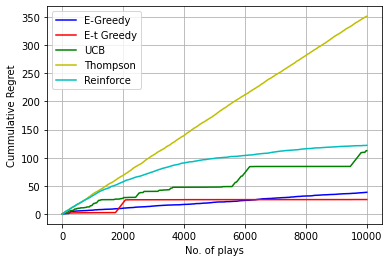

In [41]:
plt.plot(np.cumsum(regret_arr),'b',label='E-Greedy')
plt.plot(np.cumsum(regret_arr2),'r',label='E-t Greedy')
plt.plot(np.cumsum(regret_arr3),'g',label='UCB')
plt.plot(np.cumsum(regret_arr5),'y',label='Thompson')
plt.plot(np.cumsum(Recomp_bernoulli.regret),'c',label='Reinforce')
plt.legend(loc='upper left',ncol=1)
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

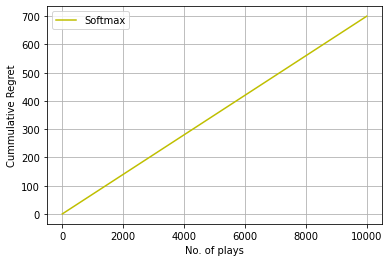

In [42]:
plt.plot(np.cumsum(regret_arr4),'y',label='Softmax')
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.legend()
plt.grid()

## K=5

In [43]:
#E-Greedy
no_of_games=10000
reward_matrix = np.zeros((no_of_games,5))
action_matrix = np.zeros((no_of_games,5))
regret_arr = np.zeros((1,no_of_games))[0]
exp1 = epsilon_Greedy(0.1,no_of_arms=5,no_of_games=10000,is_e_i_greedy=0)
for i in range(no_of_games):
  arm=exp1.select_arms(reward_matrix,action_matrix,i)
  action_matrix[i,int(arm)-1]=1
  reward_matrix[i,int(arm)-1],regret_arr[i] = exp1.reward_generator('guassian', int(arm),i) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [44]:
#E-t Greedy
no_of_games=10000
reward_matrix2 = np.zeros((no_of_games,5))
action_matrix2 = np.zeros((no_of_games,5))
regret_arr2 = np.zeros((1,no_of_games))[0]
exp2 = epsilon_Greedy(0.1,no_of_arms=5,no_of_games=10000,is_e_i_greedy=1)
for i in range(no_of_games):
  arm=exp2.select_arms(reward_matrix2,action_matrix2,i)
  action_matrix2[i,int(arm)-1]=1
  reward_matrix2[i,int(arm)-1],regret_arr2[i] = exp2.reward_generator('guassian', int(arm),i) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [45]:
#UCB
reward_matrix3 = np.zeros((no_of_games,5))
action_matrix3 = np.zeros((no_of_games,5))
regret_arr3 = np.zeros((1,no_of_games))[0]
ucb1 = UCB(no_of_arms=5,no_of_games=10000)
for i in range(10000):
  arm=ucb1.select_arms(reward_matrix3,action_matrix3,i)
  action_matrix3[i,int(arm)-1]=1
  reward_matrix3[i,int(arm)-1],regret_arr3[i] = ucb1.reward_generator('guassian', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


In [46]:
#Softmax

reward_matrix4 = np.zeros((no_of_games,5))
action_matrix4 = np.zeros((no_of_games,5))
regret_arr4 = np.zeros((1,no_of_games))[0]
soft = Softmax(temprature=0.01,no_of_arms=5,no_of_games=10000)
for i in range(10000):
  arm=soft.select_arms(reward_matrix4,action_matrix4,i)
  action_matrix4[i,int(arm)-1]=1
  reward_matrix4[i,int(arm)-1],regret_arr4[i] = soft.reward_generator('guassian', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [47]:
#Thompson-Sampling

reward_matrix5 = np.zeros((no_of_games,5))
action_matrix5 = np.zeros((no_of_games,5))
regret_arr5 = np.zeros((1,no_of_games))[0]
TS = Thompson_Sampling(no_of_arms=5,no_of_games=10000)
for i in range(10000):
  arm=TS.select_arms(reward_matrix5,action_matrix5,i)
  action_matrix5[i,int(arm)-1]=1
  reward_matrix5[i,int(arm)-1],regret_arr5[i] = TS.reward_generator('guassian', int(arm),i) 


0.0 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


In [48]:
# Reinforce
Recomp_bernoulli = RC(n_arms=5,no_of_plays=10000)

for i in range(10000):
  Recomp_bernoulli.update('normy',i)

print(f'The learnt preference vector for Normal Rewards is{Recomp_bernoulli.preference}')
print(f'The best arm from Algorithm is {np.argmax(Recomp_bernoulli.preference)+1}')


The learnt preference vector for Normal Rewards is[ 1.19025967  4.93712828 -0.88570275 -1.05375458 -1.09542223]
The best arm from Algorithm is 2


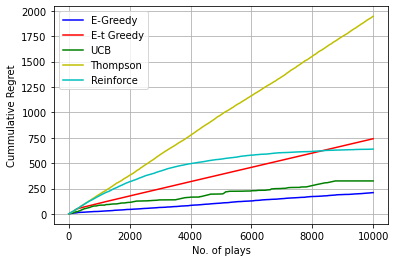

In [49]:
plt.plot(np.cumsum(regret_arr),'b',label='E-Greedy')
plt.plot(np.cumsum(regret_arr2),'r',label='E-t Greedy')
plt.plot(np.cumsum(regret_arr3),'g',label='UCB')
plt.plot(np.cumsum(regret_arr5),'y',label='Thompson')
plt.plot(np.cumsum(Recomp_bernoulli.regret),'c',label='Reinforce')
plt.legend(loc='upper left',ncol=1)
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

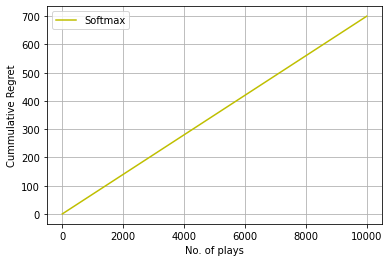

In [50]:
plt.plot(np.cumsum(regret_arr4),'y',label='Softmax')
plt.legend()
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

## K=10

In [51]:
#E-Greedy
no_of_games=10000
reward_matrix = np.zeros((no_of_games,10))
action_matrix = np.zeros((no_of_games,10))
regret_arr = np.zeros((1,no_of_games))[0]
exp1 = epsilon_Greedy(0.1,no_of_arms=10,no_of_games=10000,is_e_i_greedy=0)
for i in range(no_of_games):
  arm=exp1.select_arms(reward_matrix,action_matrix,i)
  action_matrix[i,int(arm)-1]=1
  reward_matrix[i,int(arm)-1],regret_arr[i] = exp1.reward_generator('guassian', int(arm),i) 


  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [52]:
#E-t Greedy
no_of_games=10000
reward_matrix2 = np.zeros((no_of_games,10))
action_matrix2 = np.zeros((no_of_games,10))
regret_arr2 = np.zeros((1,no_of_games))[0]
exp2 = epsilon_Greedy(0.1,no_of_arms=10,no_of_games=10000,is_e_i_greedy=1)
for i in range(no_of_games):
  arm=exp2.select_arms(reward_matrix2,action_matrix2,i)
  action_matrix2[i,int(arm)-1]=1
  reward_matrix2[i,int(arm)-1],regret_arr2[i] = exp2.reward_generator('guassian', int(arm),i) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


In [53]:
#UCB
reward_matrix3 = np.zeros((no_of_games,10))
action_matrix3 = np.zeros((no_of_games,10))
regret_arr3 = np.zeros((1,no_of_games))[0]
ucb1 = UCB(no_of_arms=10,no_of_games=10000)
for i in range(10000):
  arm=ucb1.select_arms(reward_matrix3,action_matrix3,i)
  action_matrix3[i,int(arm)-1]=1
  reward_matrix3[i,int(arm)-1],regret_arr3[i] = ucb1.reward_generator('guassian', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


In [54]:
#Softmax

reward_matrix4 = np.zeros((no_of_games,10))
action_matrix4 = np.zeros((no_of_games,10))
regret_arr4 = np.zeros((1,no_of_games))[0]
soft = Softmax(temprature=0.01,no_of_arms=10,no_of_games=10000)
for i in range(10000):
  arm=soft.select_arms(reward_matrix4,action_matrix4,i)
  action_matrix4[i,int(arm)-1]=1
  reward_matrix4[i,int(arm)-1],regret_arr4[i] = soft.reward_generator('guassian', int(arm),i) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


In [55]:
#Thompson-Sampling

reward_matrix5 = np.zeros((no_of_games,10))
action_matrix5 = np.zeros((no_of_games,10))
regret_arr5 = np.zeros((1,no_of_games))[0]
TS = Thompson_Sampling(no_of_arms=10,no_of_games=10000)
for i in range(10000):
  arm=TS.select_arms(reward_matrix5,action_matrix5,i)
  action_matrix5[i,int(arm)-1]=1
  reward_matrix5[i,int(arm)-1],regret_arr5[i] = TS.reward_generator('guassian', int(arm),i) 


0.0 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in double_scalars


In [56]:
# Reinforce
Recomp_bernoulli = RC(n_arms=10,no_of_plays=10000)

for i in range(10000):
  Recomp_bernoulli.update('normy',i)

print(f'The learnt preference vector for Bernoulli Rewards is{Recomp_bernoulli.preference}')
print(f'The best arm from Algorithm is {np.argmax(Recomp_bernoulli.preference)+1}')


The learnt preference vector for Bernoulli Rewards is[ 0.56808961  7.98385672 -0.34099472 -0.31131716 -0.57841433  0.38244521
  0.14631962 -0.73755337 -0.1049127  -0.71711387]
The best arm from Algorithm is 2


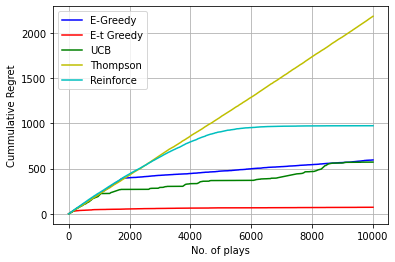

In [57]:
plt.plot(np.cumsum(regret_arr),'b',label='E-Greedy')
plt.plot(np.cumsum(regret_arr2),'r',label='E-t Greedy')
plt.plot(np.cumsum(regret_arr3),'g',label='UCB')
plt.plot(np.cumsum(regret_arr5),'y',label='Thompson')
plt.plot(np.cumsum(Recomp_bernoulli.regret),'c',label='Reinforce')
plt.legend(loc='upper left',ncol=1)
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()

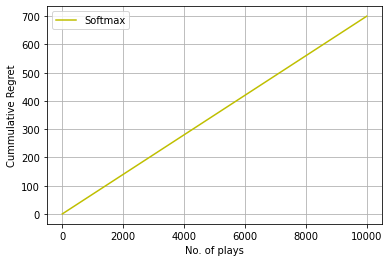

In [58]:
plt.plot(np.cumsum(regret_arr4),'y',label='Softmax')
plt.legend()
plt.xlabel('No. of plays')
plt.ylabel("Cummulative Regret")
plt.grid()